In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [53]:
#importing datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Null Values

In [56]:
#dealing with null values in the train dataset
null = train.isna().sum().sort_values(ascending = False)
null_2 = test.isna().sum().sort_values(ascending = False)
null_values = pd.concat([null, null_2], keys = ['train null', 'test null'], axis = 1)
null_values.head()

/home/ada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,train null,test null
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0
Name,0,0.0


In [57]:
#replace all missing values in the age column w/the mean.
x = train.iloc[:, -7].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
train.iloc[:, -7] = x
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
#replace all missing values in the age column w/the mean.(test)
x = test.iloc[:, -7].values
x = x.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(x)
x = imputer.transform(x)
test.iloc[:, -7] = x
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
#replace all missing values in the Embarked column w/the value with highest frequency.
y = train.iloc[:, -1].values
y = y.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(y)
y = imputer.transform(y)
train.iloc[:, -1] = y
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [60]:
#dealing with the null fare value (test)
#Check the row with null Fare Value
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [61]:
#check for Fare prices for passengers in 3rd class who embarked from Southampton.
for a,b,c in zip(test["Fare"], test["Pclass"], test["Embarked"]):
    if b == 3 and c == "S":
        fare = a

#find the average fare for these passengers
class_3_list = [fare]
from statistics import mean
m = mean(class_3_list)

#replace the nan with this average
test["Fare"].fillna(m, inplace = True) 
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [62]:
#dealing w/missing cabin data in both datasets
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    

## dropping less significant columns

In [63]:
#drop the cabin variable
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
train = train.drop(['PassengerId'], axis=1)
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

## Remapping categorical data to int type.

In [64]:
#remapping female/male to 0/1 in sex column 
#remapping Embarked( C, Q S) to 0/1/2 in sex column
dataset = [train, test]
for data in dataset:
    data.Sex[data.Sex == 'female'] = 0
    data.Sex[data.Sex == 'male'] = 1
    data.Embarked[data.Embarked == 'C'] = 0
    data.Embarked[data.Embarked == 'Q'] = 1
    data.Embarked[data.Embarked == 'S'] = 2

/home/ada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/ada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/ada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

## Exploring variables relation to survival

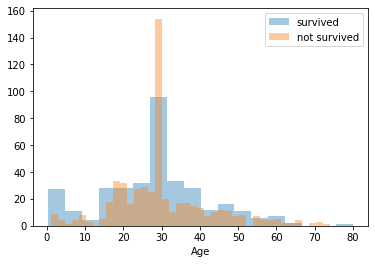

In [65]:
#age
survived = 'survived'
not_survived = 'not survived'
ax = sns.distplot(train[train['Survived']==1].Age.dropna(), bins=18, label = survived,kde =False)
ax = sns.distplot(train[train['Survived']==0].Age.dropna(), bins=40, label = not_survived,kde =False)
ax.legend()

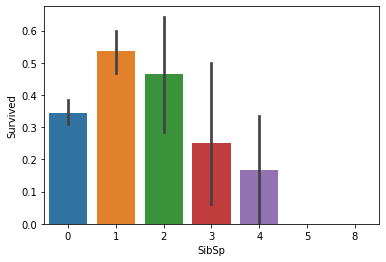

In [66]:
#sibsp
sns.barplot(x='SibSp', y='Survived', data=train)

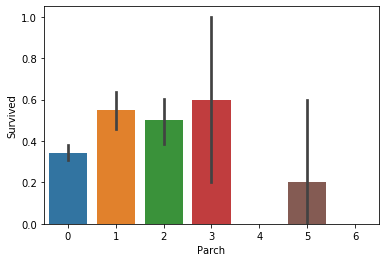

In [67]:
#parch
sns.barplot(x='Parch', y='Survived', data=train)

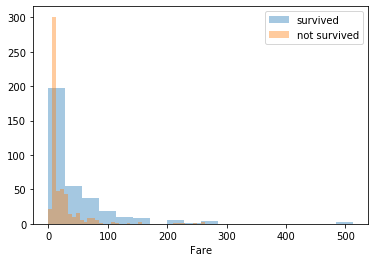

In [68]:
#fare
survived = 'survived'
not_survived = 'not survived'
ax = sns.distplot(train[train['Survived']==1].Fare.dropna(), bins=18, label = survived,kde =False)
ax = sns.distplot(train[train['Survived']==0].Fare.dropna(), bins=40, label = not_survived,kde =False)
ax.legend()

## creating categories

In [69]:
#creating categories
#age
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

#sibsp
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['SibSp'] == 0, 'SibSp'] = 0
    dataset.loc[(dataset['SibSp'] > 0) & (dataset['SibSp'] <= 2), 'SibSp'] = 1
    dataset.loc[(dataset['SibSp'] > 2) & (dataset['SibSp'] <= 4), 'SibSp']   = 2
    dataset.loc[ dataset['SibSp'] > 4, 'SibSp'] = 3
    dataset['SibSp'] = dataset['SibSp'].astype(int)
    
#parch
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Parch'] <= 3, 'Parch'] = 0
    dataset.loc[(dataset['Parch'] > 3) & (dataset['Parch'] <= 4), 'Parch'] = 1
    dataset.loc[(dataset['Parch'] > 4) & (dataset['Parch'] <= 5), 'Parch']   = 2
    dataset.loc[(dataset['Parch'] > 5) & (dataset['Parch'] <= 6), 'Parch']   = 3
    dataset['Parch'] = dataset['Parch'].astype(int)
    
#fare
data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 200), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 200, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [70]:
#handling the name column
data = [train, test]
titles = {"Mr": 0, "Mrs": 1, "Miss": 2, "Master": 3, "Rare": 4}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [71]:
data = [train, test]
for i in data:
    print(i.describe())

         Survived      Pclass         Age       SibSp      Parch        Fare  \
count  891.000000  891.000000  891.000000  891.000000  891.00000  891.000000   
mean     0.383838    2.308642    3.578002    0.382716    0.01908    1.586981   
std      0.486592    0.836071    1.753753    0.627545    0.19161    1.271118   
min      0.000000    1.000000    0.000000    0.000000    0.00000    0.000000   
25%      0.000000    2.000000    2.000000    0.000000    0.00000    0.500000   
50%      0.000000    3.000000    4.000000    0.000000    0.00000    2.000000   
75%      1.000000    3.000000    5.000000    1.000000    0.00000    2.000000   
max      1.000000    3.000000    6.000000    3.000000    3.00000    5.000000   

             Deck       Title  
count  891.000000  891.000000  
mean     6.936027    0.794613  
std      2.074282    1.076519  
min      0.000000    0.000000  
25%      8.000000    0.000000  
50%      8.000000    0.000000  
75%      8.000000    2.000000  
max      8.000000    4.

## Fitting RandomForest Classifier

In [86]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Age_Class
0,0,3,1,2,1,0,0,2,8,0,6
1,1,1,0,5,1,0,3,0,3,1,5
2,1,3,0,3,0,0,1,2,8,2,9
3,1,1,0,5,1,0,3,2,3,1,5
4,0,3,1,5,0,0,1,2,8,0,15
5,0,3,1,4,0,0,1,1,8,0,12
6,0,1,1,6,0,0,3,2,5,0,6
7,0,3,1,0,2,0,2,2,8,3,0
8,1,3,0,3,0,0,1,2,8,1,9
9,1,2,0,1,1,0,2,0,8,1,2


## Submission File

In [89]:
# Fitting Random Forest Classifier
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

# Fitting Random Forest Classification to Training set
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest




91.81

In [90]:
print(Y_prediction)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [91]:
new_id = test.iloc[:, 0]
file = pd.DataFrame({'PassengerId':new_id, 'Survived': predicted_survived})
submission = file.set_index('PassengerId')
submission.to_csv('submission_2.csv')
